In [ ]:
# Task 4 – Optimization Model
#date 07-09-2025
# Shaunak Damodar Sinai Kunde
# CODTECH Internship task 4_Optimisation Model
#Industrial Production Allocation (IIP)

In [3]:
!pip install pulp

In [4]:
#Cell 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, PULP_CBC_CMD

In [5]:
#Cell 2: Load Dataset
# Load the filtered IIP dataset
file_path = "C://Users//kunde//Desktop//Virtual internship//CodTech IT Solutions Pvt Ltd//CodTech IT Solutions Pvt Ltd Internship//Task-4 Optimisation Model using Data Science//iip_2.xlsx" 
df = pd.read_excel(file_path)

# Show first 5 rows
df.head()

,year,month,type,category,sub_category,index,growth_rate
0,2025,July,General,General,NaN,155.0,3.5
1,2025,July,Sectoral,Mining,NaN,107.7,-7.2
2,2025,July,Sectoral,Manufacturing,Manufacture of Food Products,118.4,-1.3
3,2025,July,Sectoral,Manufacturing,Manufacture of Beverages,105.8,-6.3
4,2025,July,Sectoral,Manufacturing,Manufacture of Tobacco Products,90.1,10.8


In [6]:
df1=df[['index','growth_rate']]
df1.describe()

,index,growth_rate
count,5280.000000,5247.000000
mean,120.916913,2.694435
std,31.720730,15.514329
min,0.200000,-99.900000
25%,102.475000,-2.800000
50%,115.500000,2.900000
75%,132.300000,8.100000
max,296.400000,186.000000


In [ ]:
#Cell 3. Data Cleaning
# =========================
# Ensure proper column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
print("\nColumns:", df.columns)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Columns: Index(['year', 'month', 'type', 'category', 'sub_category', 'index',
       'growth_rate'],
      dtype='object')

Missing values:
 year               0
month              0
type               0
category           0
sub_category    1600
index              0
growth_rate       33
dtype: int64


C:\Users\kunde\AppData\Local\Temp\ipykernel_16768\2113172914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_growth, x="growth_rate", y="category", palette="viridis")


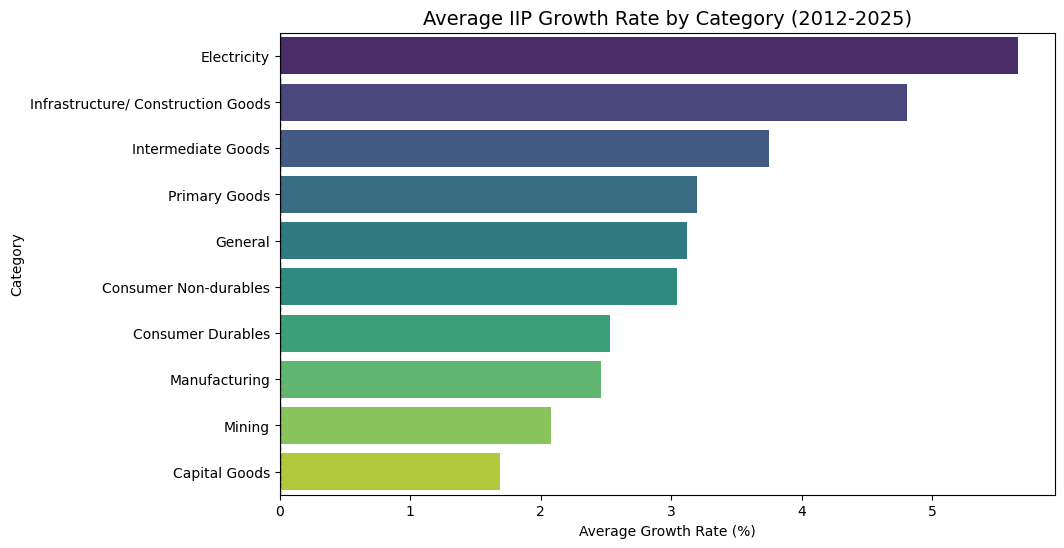

In [ ]:
#Cell 4. Data Exploration and Vizualisation
#4.1
plt.figure(figsize=(10,6))

avg_growth = df.groupby("category")["growth_rate"].mean().reset_index()
avg_growth = avg_growth.sort_values("growth_rate", ascending=False)

sns.barplot(data=avg_growth, x="growth_rate", y="category", palette="viridis")
plt.title("Average IIP Growth Rate by Category (2012-2025)", fontsize=14)
plt.xlabel("Average Growth Rate (%)")
plt.ylabel("Category")
plt.axvline(0, color="black", linestyle="--", linewidth=1)  # reference line at 0
plt.show()

C:\Users\kunde\AppData\Local\Temp\ipykernel_16768\2558592355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="category", y="index", palette="Set2")


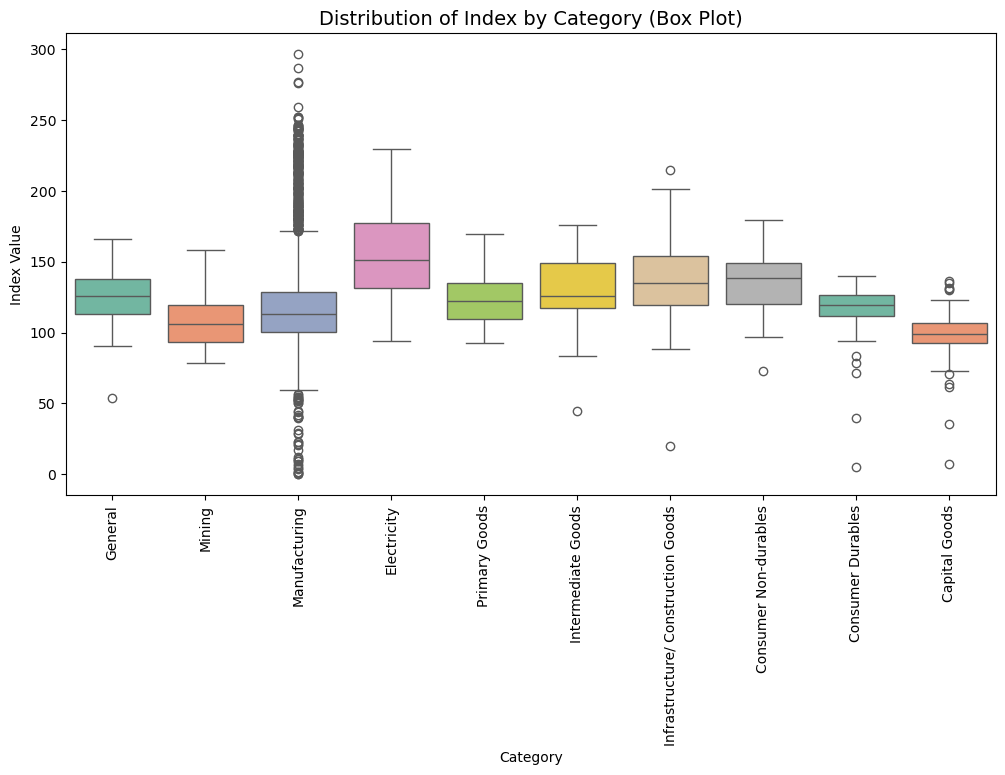

In [ ]:
#4.2
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x="category", y="index", palette="Set2")

plt.title("Distribution of Index by Category (Box Plot)", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Index Value")
plt.xticks(rotation=90)
plt.show()

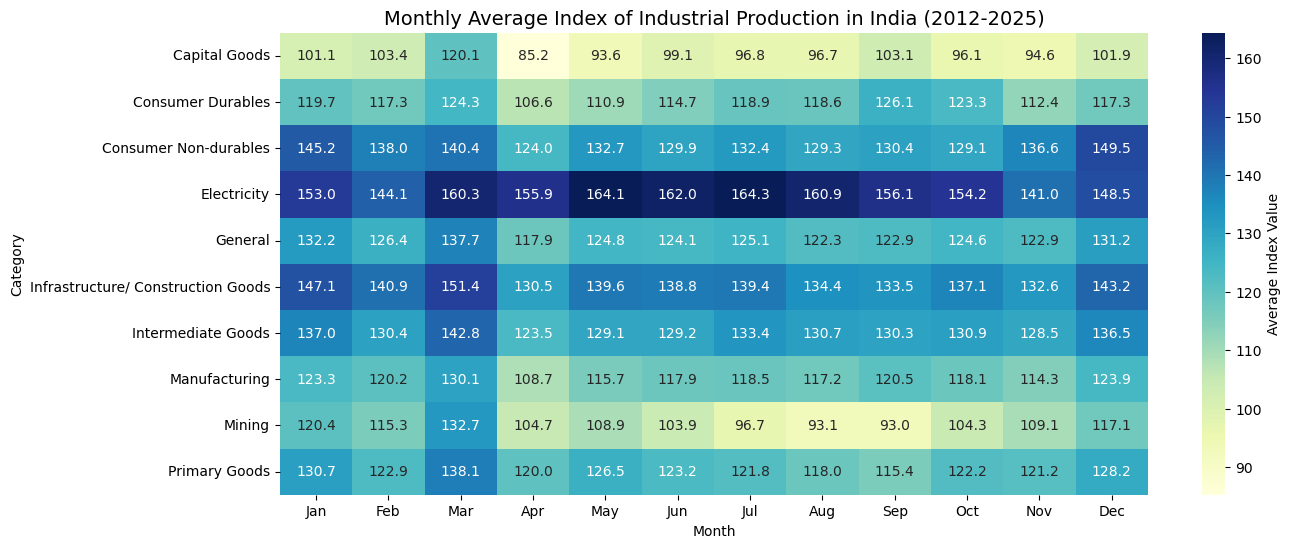

In [ ]:
#4.3
import calendar

# Convert month names (like "July") to month numbers
df['month_num'] = df['month'].apply(lambda x: list(calendar.month_name).index(x))

# Map month numbers to short names (Jan, Feb, …)
df['month_name'] = df['month_num'].apply(lambda x: calendar.month_abbr[x])

# Pivot table with month names
pivot_table = df.pivot_table(
    values="index",
    index="category",
    columns="month_name",
    aggfunc="mean"
)

# Reorder columns Jan → Dec
month_order = [calendar.month_abbr[i] for i in range(1, 13)]
pivot_table = pivot_table.reindex(columns=month_order)

plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Average Index Value'})
plt.title("Monthly Average Index of Industrial Production in India (2012-2025)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Category")
plt.show()

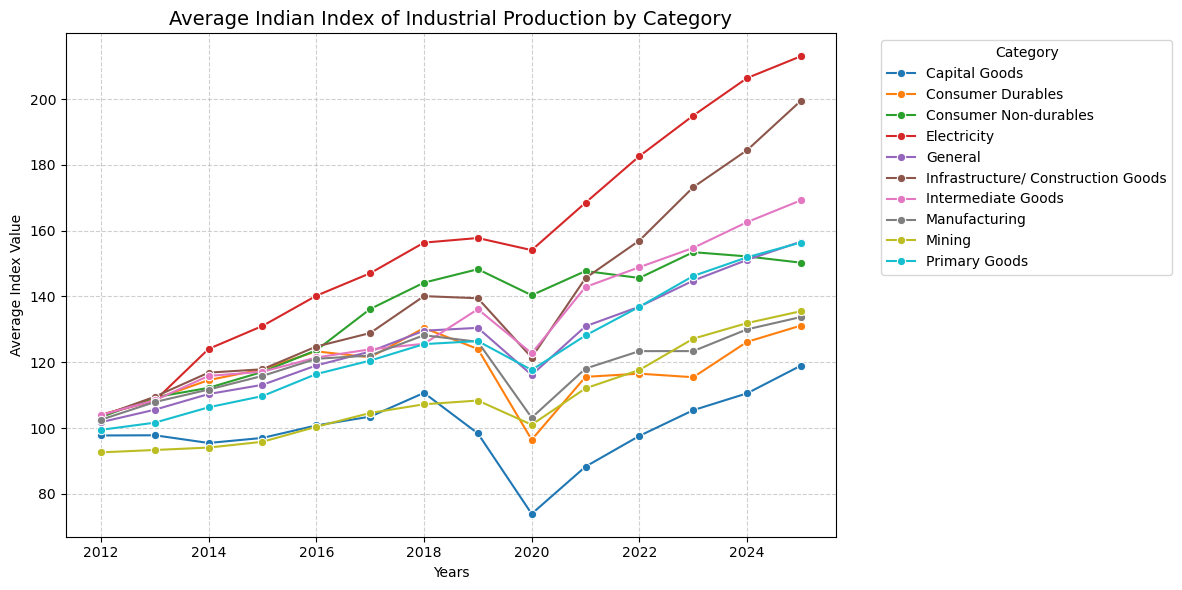

In [ ]:
#4.4
# Group by year and category, averaging the index
df_line = df.groupby(["year", "category"])["index"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_line,
    x="year",
    y="index",
    hue="category",
    marker="o"
)

plt.title("Average Indian Index of Industrial Production by Category", fontsize=14)
plt.xlabel("Years")
plt.ylabel("Average Index Value")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

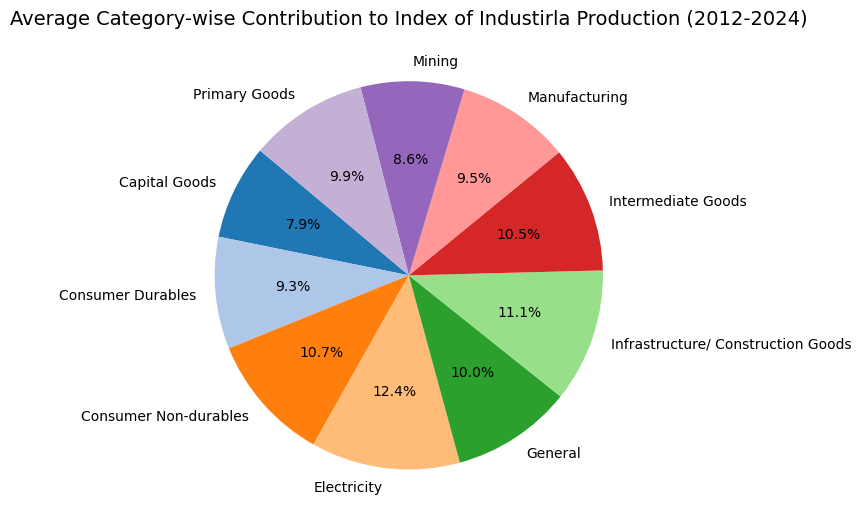

In [ ]:
#4.5
# Average index across all years for each category
df_avg = df_line.groupby("category")["index"].mean().reset_index()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    df_avg["index"],
    labels=df_avg["category"],
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.tab20.colors
)

plt.title("Average Category-wise Contribution to Index of Industirla Production (2012-2024)", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# 4.6 Select Negative Growth and Low IIP Items
# Filter sub-categories with index < 100 and growth_rate < 0
filtered = df[(df["index"] < 100) & (df["growth_rate"] < 0)]

# Select only relevant columns for clarity
result = filtered[["sub_category", "index", "growth_rate"]].drop_duplicates()

# Show first 20 rows
print(result.head(20))


                                          sub_category  index  growth_rate
7          Manufacture of Leather and Related Products   98.9         -3.0
9              Manufacture of Paper and Paper Products   79.4         -2.8
10         Printing and Reproduction of Recorded Media   75.4        -10.7
24                                 Other Manufacturing   71.4        -14.3
40         Manufacture of Leather and Related Products   96.2         -3.0
42             Manufacture of Paper and Paper Products   77.3         -3.1
43         Printing and Reproduction of Recorded Media   76.7        -10.1
57                                 Other Manufacturing   61.7        -17.3
73         Manufacture of Leather and Related Products   97.9         -4.6
75             Manufacture of Paper and Paper Products   77.4         -4.4
76         Printing and Reproduction of Recorded Media   77.1        -16.1
83   Manufacture of Fabricated Metal Products, Exce...   97.7         -0.1
90                       

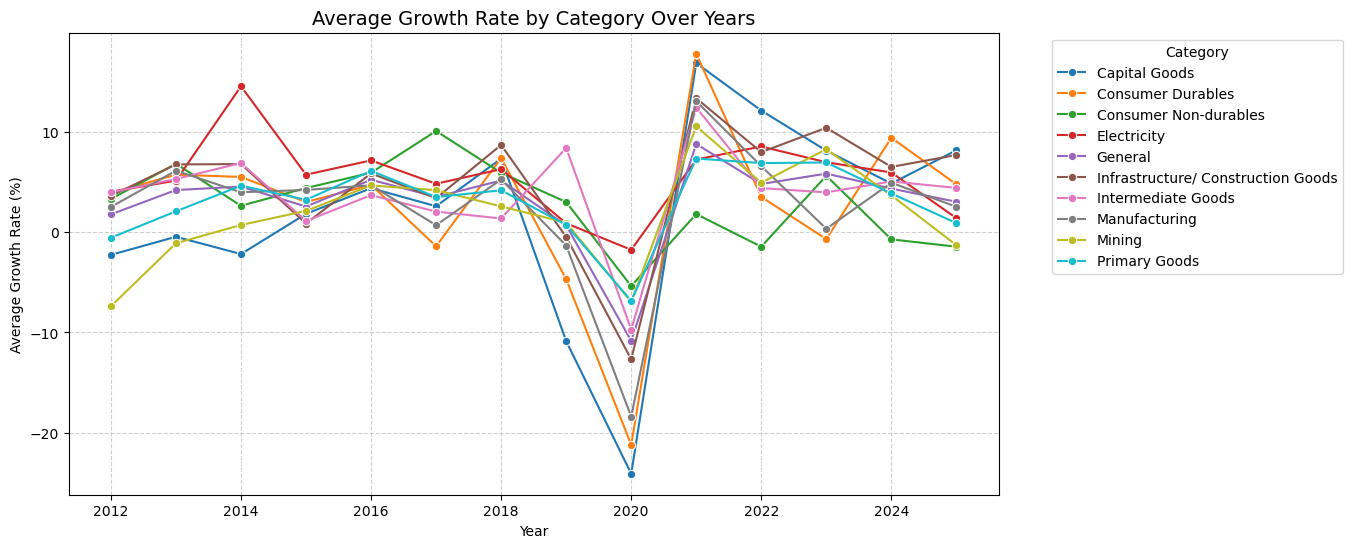

In [ ]:
# 4.7 Compute average growth_rate per year for each category
avg_growth = df.groupby(["year", "category"])["growth_rate"].mean().reset_index()

plt.figure(figsize=(12,6))

# Lineplot with different lines for categories
sns.lineplot(
    data=avg_growth,
    x="year",
    y="growth_rate",
    hue="category",
    marker="o"
)

plt.title("Average Growth Rate by Category Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Growth Rate (%)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

C:\Users\kunde\AppData\Local\Temp\ipykernel_16768\2386455157.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


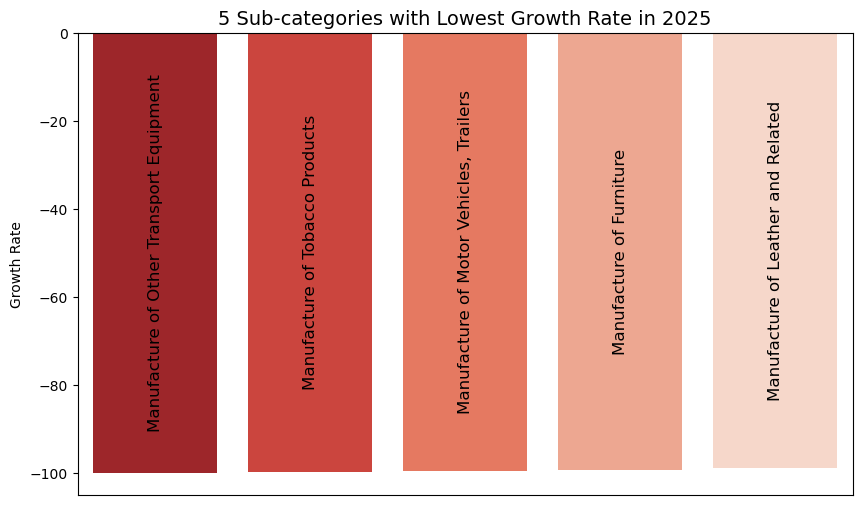

In [ ]:
# 4.8 Get 5 sub-categories with lowest growth_rate in 2025
# Filter rows where year = 2025
df_2025 = df[df["year"] == 2025]
# Extract only the growth_rate column for 2025
growth_rate= df_2025["growth_rate"]
lowest5 = df.sort_values("growth_rate").head(5)
lowest5["sub_category_short"] = lowest5["sub_category"].apply(
    lambda x: " ".join(str(x).split()[:5])
)

plt.figure(figsize=(10,6))
bars = sns.barplot(
    data=lowest5.sort_values("growth_rate", ascending=True),
    x="sub_category_short", y="growth_rate", palette="Reds_r"
)

plt.title("5 Sub-categories with Lowest Growth Rate in 2025", fontsize=14)
plt.xlabel(""); plt.ylabel("Growth Rate")

# Put names inside bars
for bar, label in zip(bars.patches, lowest5["sub_category_short"]):
    plt.text(
        bar.get_x() + bar.get_width()/2, bar.get_height()/2,
        label, ha="center", va="center", color="black", fontsize=12,rotation=90
    )

plt.xticks([])  # remove bottom labels
plt.show()

In [70]:
#Cell 5. Optimization Function
def optimize_growth(df, improvement_factor=0.15, index_cap=200):
    """
    Optimization function to simulate improving weak sub-categories.
    - df: DataFrame containing ['sub_category', 'index', 'growth_rate']
    - improvement_factor: fraction to improve growth_rate & index
    - index_cap: max allowed index after optimization
    """
    df_opt = df.copy()

    # Only apply optimization where index < 100 & growth < 0
    mask = (df_opt["index"] < 100) & (df_opt["growth_rate"] < 0)

    # Improve index (but cap it)
    df_opt.loc[mask, "index"] = (
        df_opt.loc[mask, "index"] * (1 + improvement_factor)
    ).clip(upper=index_cap)

    # Improve growth rate (shift negative towards positive)
    df_opt.loc[mask, "growth_rate"] = df_opt.loc[mask, "growth_rate"] * (1 + improvement_factor)

    return df_opt

In [71]:
# Cell 6. Run Optimization for Each Category
optimized_results = []

categories = df["category"].unique()

for cat in categories:
    sub_df = df[df["category"] == cat][["sub_category", "index", "growth_rate"]].drop_duplicates()
    
    # Before optimization
    avg_index_before = sub_df["index"].mean()
    avg_growth_before = sub_df["growth_rate"].mean()
    
    # Apply optimization
    sub_df_opt = optimize_growth(sub_df, improvement_factor=0.20)
    
    # After optimization
    avg_index_after = sub_df_opt["index"].mean()
    avg_growth_after = sub_df_opt["growth_rate"].mean()
    
    optimized_results.append({
        "category": cat,
        "index_before": avg_index_before,
        "growth_before": avg_growth_before,
        "index_after": avg_index_after,
        "growth_after": avg_growth_after
    })

import pandas as pd
opt_df = pd.DataFrame(optimized_results)
display(opt_df)

,category,index_before,growth_before,index_after,growth_after
0,General,125.856604,3.127215,126.536730,3.007975
1,Mining,108.160000,2.081132,112.090875,1.772075
2,Manufacturing,118.971347,2.457931,121.893721,1.964186
3,Electricity,155.528125,5.659748,155.770500,5.652075
4,Primary Goods,123.987500,3.194969,125.196250,3.132201
5,Intermediate Goods,131.780625,3.748428,131.941000,3.618113
6,Infrastructure/ Construction Goods,138.995000,4.811950,139.500125,4.650189
7,Consumer Non-durables,134.661250,3.045283,135.120875,2.978491
8,Consumer Durables,117.390625,2.528931,117.890875,2.192956
9,Capital Goods,99.144025,1.684177,105.145031,0.956203


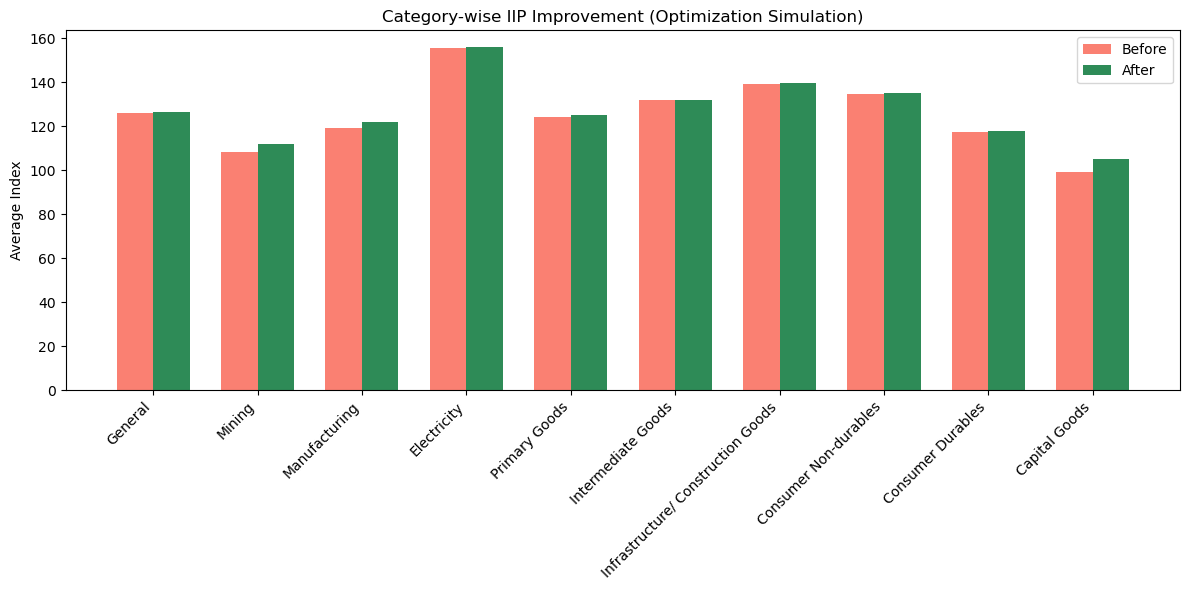

In [ ]:
# Cell 7.1 Visualize Before vs After (Per Category)
import matplotlib.pyplot as plt
import numpy as np

# Bar chart for Index (Before vs After)
x = np.arange(len(opt_df))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, opt_df["index_before"], width, label="Before", color="salmon")
plt.bar(x + width/2, opt_df["index_after"], width, label="After", color="seagreen")

plt.xticks(x, opt_df["category"], rotation=45, ha="right")
plt.ylabel("Average Index")
plt.title("Category-wise IIP Improvement (Optimization Simulation)")
plt.legend()
plt.tight_layout()
plt.show()

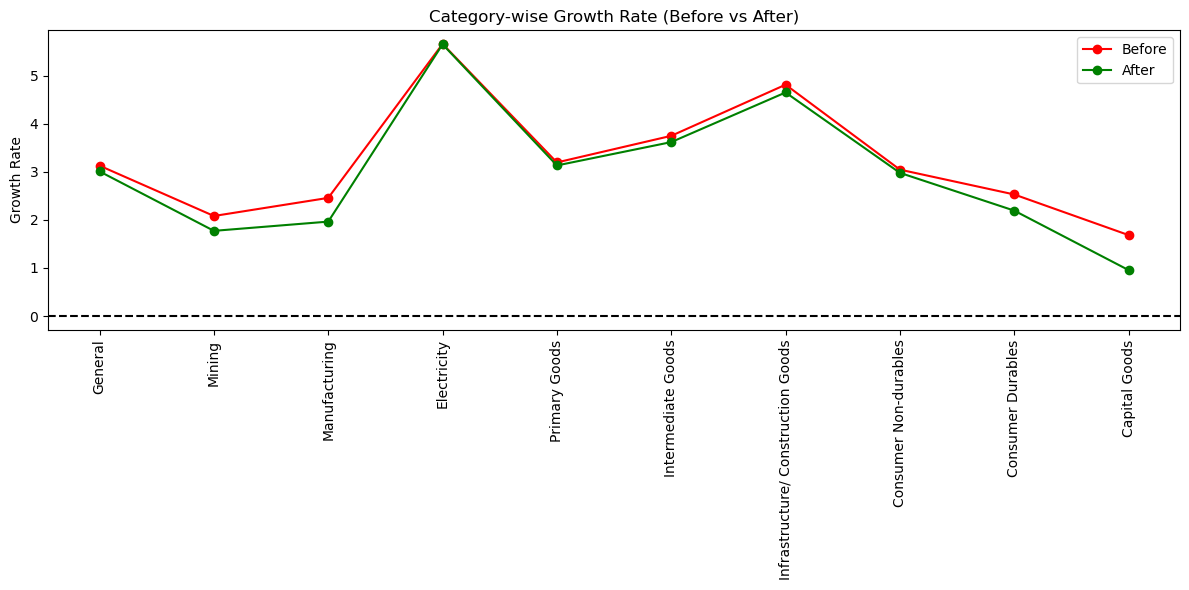

In [74]:
# Cell 7.2 Line chart for Growth Rate Before vs After
plt.figure(figsize=(12,6))
plt.plot(opt_df["category"], opt_df["growth_before"], marker="o", label="Before", color="red")
plt.plot(opt_df["category"], opt_df["growth_after"], marker="o", label="After", color="green")
plt.axhline(0, color="black", linestyle="--")
plt.ylabel("Growth Rate")
plt.title("Category-wise Growth Rate (Before vs After)")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [75]:
# Cell 5. Optimization Function (Bottom 5 Focused)

def optimize_bottom5(df, improvement_factor=0.2):
    df_opt = df.copy()

    # Identify bottom 5 performers by growth_rate
    bottom5 = df_opt.sort_values("growth_rate").head(5).index

    # Apply optimization only to these bottom 5
    for idx in bottom5:
        # Boost Index by (1 + factor)
        df_opt.loc[idx, "index"] *= (1 + improvement_factor)

        # Improve Growth Rate: shift closer to 0 or positive
        current_gr = df_opt.loc[idx, "growth_rate"]
        df_opt.loc[idx, "growth_rate"] = current_gr + abs(current_gr) * improvement_factor

    return df_opt

In [76]:
# Cell 6. Run Optimization for Bottom 5 Sub-Categories

# Apply optimization function
df_optimized = optimize_bottom5(df, improvement_factor=0.2)

# Extract bottom 5 performers before and after optimization
bottom5_before = df.sort_values("growth_rate").head(5)[["sub_category", "index", "growth_rate"]]
bottom5_after  = df_optimized.loc[bottom5_before.index, ["sub_category", "index", "growth_rate"]]

print("📉 Bottom 5 Performers BEFORE Optimization:")
display(bottom5_before)

print("\n📈 Bottom 5 Performers AFTER Optimization:")
display(bottom5_after)

📉 Bottom 5 Performers BEFORE Optimization:


,sub_category,index,growth_rate
2101,Manufacture of Other Transport Equipment,0.2,-99.9
2083,Manufacture of Tobacco Products,0.3,-99.6
2100,"Manufacture of Motor Vehicles, Trailers and Se...",0.7,-99.4
2102,Manufacture of Furniture,1.4,-99.2
2086,Manufacture of Leather and Related Products,1.7,-98.7



📈 Bottom 5 Performers AFTER Optimization:


,sub_category,index,growth_rate
2101,Manufacture of Other Transport Equipment,0.24,-79.92
2083,Manufacture of Tobacco Products,0.36,-79.68
2100,"Manufacture of Motor Vehicles, Trailers and Se...",0.84,-79.52
2102,Manufacture of Furniture,1.68,-79.36
2086,Manufacture of Leather and Related Products,2.04,-78.96


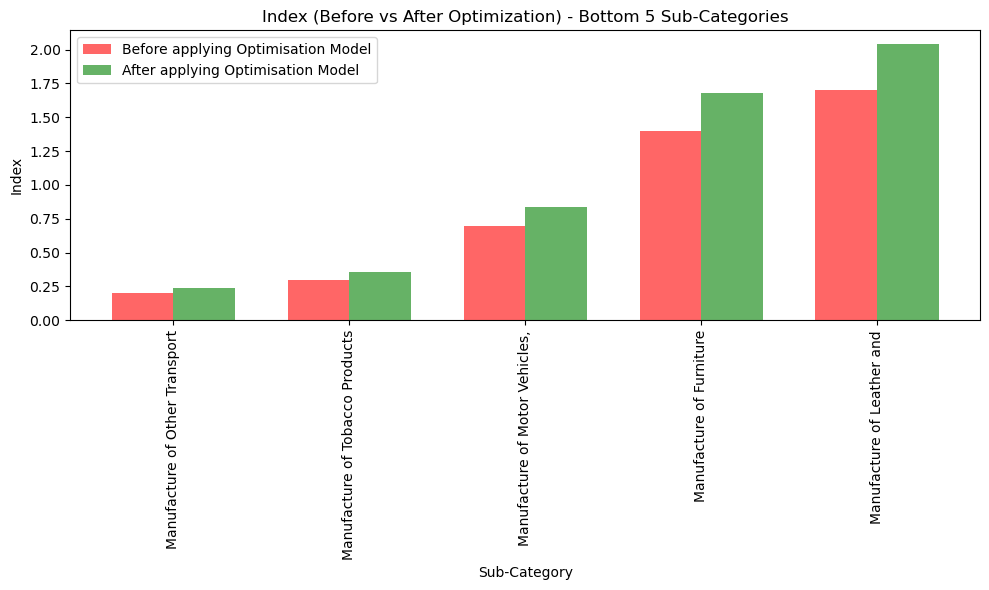

In [ ]:
#Cell 7.1 – Index as Side-by-Side Bar Chart
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
sub_categories = bottom5_before['sub_category'].apply(lambda x: ' '.join(x.split()[:4]))  # first 4 words
index_before = bottom5_before['index']
index_after = bottom5_after['index']

x = np.arange(len(sub_categories))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, index_before, width, label='Before applying Optimisation Model', color='red', alpha=0.6)
ax.bar(x + width/2, index_after, width, label='After applying Optimisation Model', color='green', alpha=0.6)

# Labels and title
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Index of Industrial Production')
ax.set_title('Index (Before vs After Optimization) - Bottom 5 Sub-Categories')
ax.set_xticks(x)
ax.set_xticklabels(sub_categories, rotation=90)  # 90 degree
ax.legend()

plt.tight_layout()
plt.show()

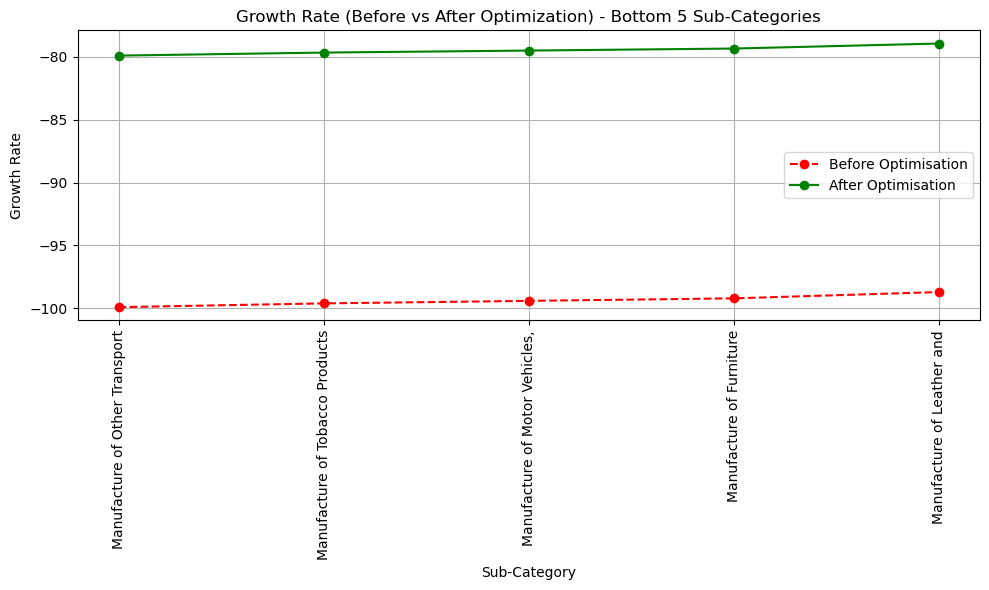

In [83]:
#Cell 7.2 – Growth Rate as Line Chart
# Prepare data
sub_categories = bottom5_before['sub_category'].apply(lambda x: ' '.join(x.split()[:4]))  # first 4 words
growth_before = bottom5_before['growth_rate']
growth_after = bottom5_after['growth_rate']

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(sub_categories, growth_before, marker='o', linestyle='--', color='red', label='Before Optimisation')
ax.plot(sub_categories, growth_after, marker='o', linestyle='-', color='green', label='After Optimisation')

# Labels and title
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Growth Rate')
ax.set_title('Growth Rate (Before vs After Optimization) - Bottom 5 Sub-Categories')
ax.legend()
ax.grid(True)
plt.xticks(rotation=90)  # 90 degree

plt.tight_layout()
plt.show()